<a href="https://colab.research.google.com/github/davidheram/KNN-PROJECT/blob/main/KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score


In [294]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

In [295]:
pd.set_option('display.max_columns', None)

In [296]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [298]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [299]:
df["label"] = df["quality"]
df = df.drop(columns=["quality"])

In [300]:
def label_to_class(q):
  if q <= 5:
    return 0
  elif  q== 6:
    return 1
  else:
    return 2

df["label"] = df["label"].apply(label_to_class)

In [301]:
df["label"].value_counts()

,count
label,
0,744
1,638
2,217


In [302]:
features_knn = [
    "alcohol",
    "volatile acidity",
    "sulphates",
    "density",
    "citric acid",
    "total sulfur dioxide"]


X = df[features_knn]
y = df["label"]

In [303]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [304]:
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(X), columns=scaler.get_feature_names_out())

,alcohol,volatile acidity,sulphates,density,citric acid,total sulfur dioxide
0,-0.960246,0.961877,-0.579207,0.558274,-1.391472,-0.379133
1,-0.584777,1.967442,0.128950,0.028261,-1.391472,0.624363
2,-0.584777,1.297065,-0.048089,0.134264,-1.186070,0.229047
3,-0.584777,-1.384443,-0.461180,0.664277,1.484154,0.411500
4,-0.960246,0.961877,-0.579207,0.558274,-1.391472,-0.379133
...,...,...,...,...,...,...
1594,0.072294,0.403229,-0.461180,-0.978765,-0.980669,-0.075043
1595,0.729364,0.123905,0.601055,-0.862162,-0.877968,0.137820
1596,0.541630,-0.099554,0.542042,-0.533554,-0.723916,-0.196679
1597,-0.209308,0.654620,0.305990,-0.676657,-0.775267,-0.075043


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=123, stratify=y)


In [306]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights="distance"
    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

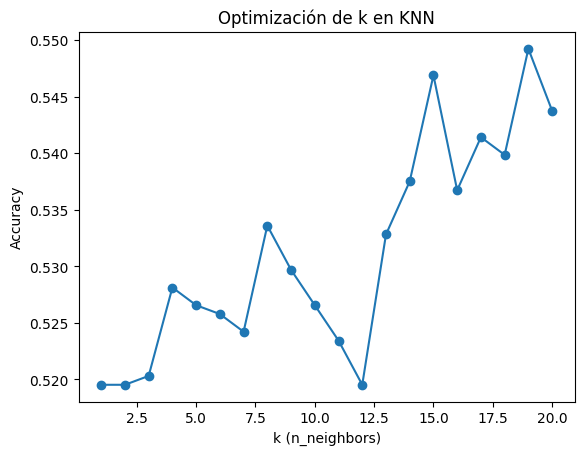

In [307]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("Optimización de k en KNN")
plt.show()

In [308]:
robot_KNN = KNeighborsClassifier(n_neighbors=7)


In [309]:
robot_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [310]:
preds = robot_KNN.predict(X_test)

In [311]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61       788
           1       0.35      0.43      0.38       421
           2       0.13      0.31      0.18        71

    accuracy                           0.49      1280
   macro avg       0.40      0.42      0.39      1280
weighted avg       0.56      0.49      0.51      1280



In [312]:
def knn(X_train, y_train):
    model = KNeighborsClassifier()
    n_neighbors=[3,4,5,6,7,8,9, 10, 13,18,19,20, 21,22, 23, 24, 25, 30]
    weights=['uniform', 'distance']
    grid = dict(n_neighbors=n_neighbors, weights=weights)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='f1_macro',error_score='raise')
    grid_result = grid_search.fit(X_train, y_train)
    return  grid_result.best_estimator_

In [313]:
model_KNN = knn(X_train, y_train)

In [314]:
y_pred = model_KNN.predict(X_test)

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       595
           1       0.47      0.41      0.44       511
           2       0.40      0.29      0.33       174

    accuracy                           0.53      1280
   macro avg       0.49      0.47      0.47      1280
weighted avg       0.52      0.53      0.52      1280



In [316]:
model_KNN

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [332]:

def predict_wine_quality(features):
    if len(features) != len(features_knn):
        raise ValueError(f"Se esperaban {len(features_knn)} valores")

    features_df = pd.DataFrame([features], columns=features_knn)
    features_scaled = scaler.transform(features_df)
    prediction = model_KNN.predict(features_scaled)[0]

    if prediction == 0:
        return "Este vino probablemente sea de baja calidad 🍶"
    elif prediction == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍾"

In [333]:
predict_wine_quality([9.4, 0.70, 0.56, 0.9978, 0.00, 34.0])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Este vino probablemente sea de baja calidad 🍶'

Aunque el segundo modelo presenta una ligera disminución en accuracy, muestra una mejora significativa en el F1 macro y en el recall de la clase minoritaria, lo que indica un desempeño más balanceado y adecuado para un problema de clasificación multiclase con desbalance.